In [99]:
# Dependencies and Setup
from matplotlib import pyplot as plt
import scipy.stats as st
import numpy as np
import pandas as pd

In [100]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
dataset_df = pd.read_csv("Data\spotify-2023.csv",encoding='latin-1')

# Display sample data
dataset_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [101]:
# Clean the data (one row has no representative values on number of streams)
dataset_df = dataset_df.drop(574,axis=0)

dataset_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [102]:
# Check data types
dataset_df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [103]:
# Update 'streams' type
dataset_df['streams'] = dataset_df['streams'].astype('int64')
#dataset_df['in_deezer_playlists'] = dataset_df['in_deezer_playlists'].astype('float64')

dataset_df.head()



,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [104]:
# Confirm update of types
dataset_df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [105]:
# Devide the stream values by 1,000,000 to express it in million
streams_mil=(dataset_df[['streams']]/1000000).round(2)
dataset_df['streams mil'] = streams_mil
dataset_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,streams mil
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,141.38
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,133.72
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,140.00
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,800.84
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,303.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,A,Major,60,24,39,57,0,8,3,91.47
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,F#,Major,42,7,24,83,1,12,6,121.87
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,C#,Major,80,81,67,4,0,8,6,73.51
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,C#,Major,82,67,77,8,0,12,5,133.90


In [106]:
# Sort the DataFrame in descending order by number of streams
streams_df=dataset_df.sort_values('streams',ascending=False)

# Display sample data
streams_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,streams mil
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,C#,Major,50,38,80,0,0,9,7,3703.90
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,...,C#,Minor,83,93,65,58,0,9,8,3562.54
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,...,C#,Major,50,45,41,75,0,11,3,2887.24
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,533,...,F#,Minor,82,54,59,69,0,18,10,2864.79
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,...,D,Major,76,91,50,54,0,7,5,2808.10


In [107]:
# Create a new dataframe with the sample of the 100 most streamed songs in Spotify
top100_streams_df = streams_df.iloc[:100]

top100_streams_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,streams mil
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,C#,Major,50,38,80,0,0,9,7,3703.90
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,...,C#,Minor,83,93,65,58,0,9,8,3562.54
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,...,C#,Major,50,45,41,75,0,11,3,2887.24
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,533,...,F#,Minor,82,54,59,69,0,18,10,2864.79
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,...,D,Major,76,91,50,54,0,7,5,2808.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,Shivers,Ed Sheeran,1,2021,9,9,10147,30,1302184087,234,...,D,Major,79,82,86,28,0,4,9,1302.18
401,Heather,Conan Gray,1,2020,3,20,6170,7,1301799902,82,...,F,Major,47,25,43,62,0,32,3,1301.80
22,I Wanna Be Yours,Arctic Monkeys,1,2013,1,1,12859,110,1297026226,24,...,NaN,Minor,48,44,42,12,2,11,3,1297.03
820,Iris,The Goo Goo Dolls,1,1998,3,31,13101,9,1284942608,137,...,B,Minor,32,49,72,0,0,9,4,1284.94


In [108]:
# Distribution by artist
artist_count = len(top100_streams_df['artist(s)_name'].unique())
print(f'There are {artist_count} artists among the most streamed songs')

artists = top100_streams_df.groupby('artist(s)_name')
artists_df = pd.DataFrame(artists['artist(s)_name'].count()).rename(columns={'artist(s)_name':'No of songs'}).reset_index()
artists_df2=artists_df.sort_values('No of songs',ascending=False)
artists_df2






There are 77 artists among the most streamed songs


,artist(s)_name,No of songs
23,Ed Sheeran,6
71,The Weeknd,5
24,Eminem,3
30,Harry Styles,3
10,Bruno Mars,3
...,...,...
36,James Arthur,1
37,John Legend,1
39,Justin Bieber,1
40,"Justin Bieber, Daniel Caesar, Giveon",1


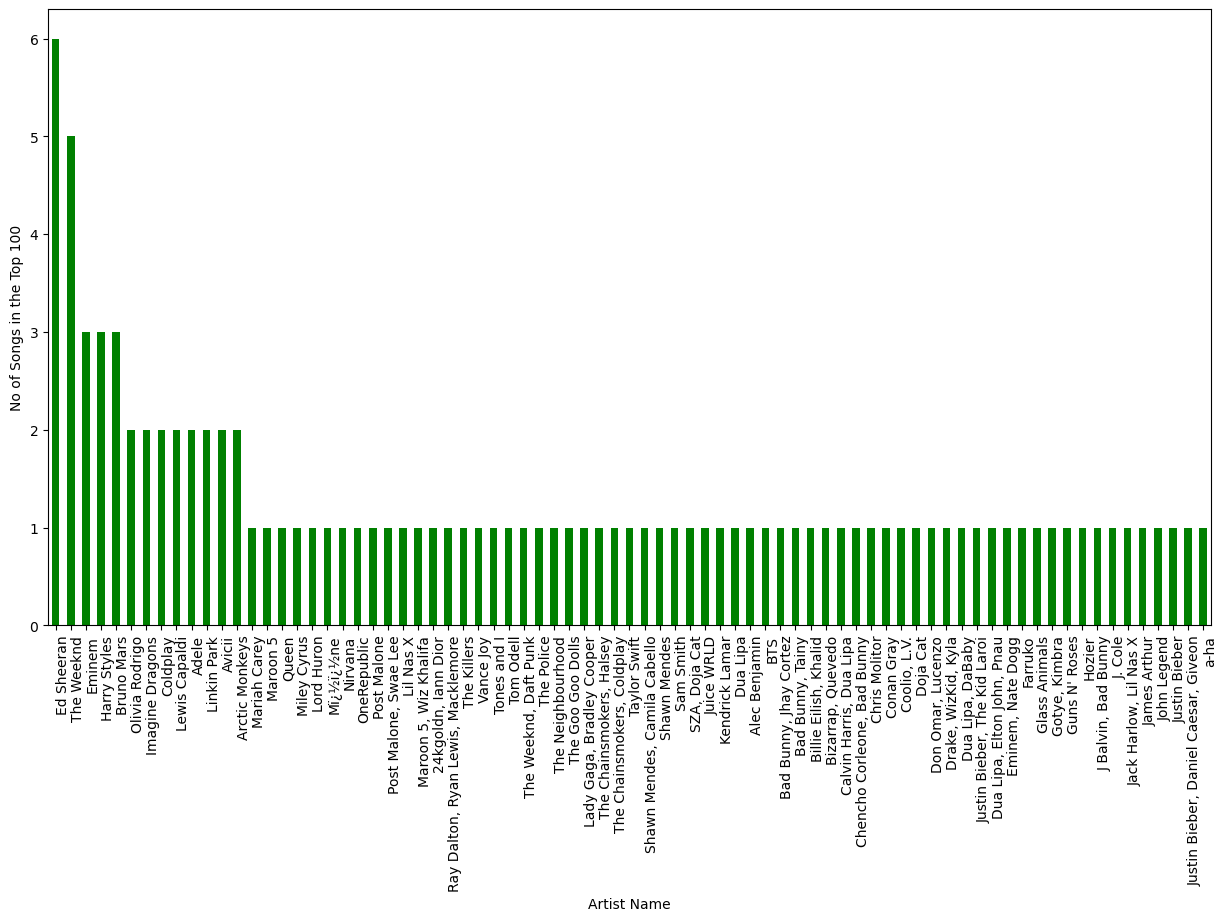

In [109]:
bar_chart=artists_df2.plot(kind='bar',facecolor='green',alpha=1,xlabel="Artist Name",ylabel="No of Songs in the Top 100",legend=False,figsize=(15,8))
xticklabels = artists_df2["artist(s)_name"]
bar_chart.set_xticklabels(xticklabels, rotation=90, rotation_mode='anchor', ha='right',fontsize=10)
plt.show()

PearsonRResult(statistic=0.008095483597435879, pvalue=0.9362863028340018)


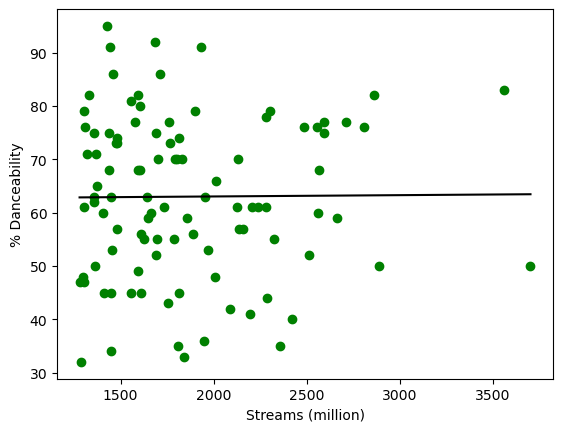

In [110]:
#Correlation between number of streams and % danceability

streams = top100_streams_df['streams mil']
danceability = top100_streams_df['danceability_%']

correlation = st.pearsonr(streams,danceability)
print(correlation)

plt.scatter(streams,danceability,marker="o", facecolors="green", edgecolors="green")
plt.xlabel("Streams (million)")
plt.ylabel("% Danceability")

e_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(streams,danceability)
pe_fit = e_slope * streams + pe_int
plt.plot(streams,pe_fit,color='black')

plt.show()

PearsonRResult(statistic=0.007367066019480839, pvalue=0.9420087087394788)


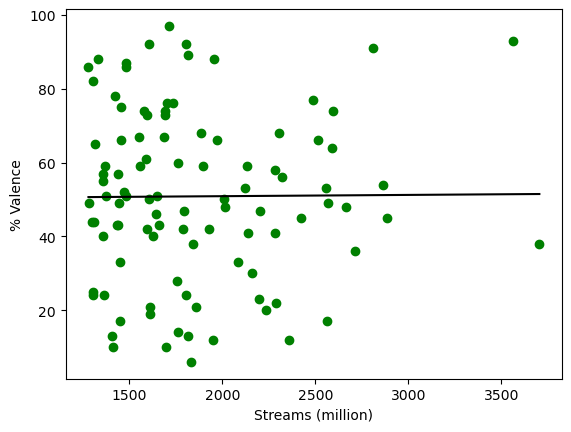

In [111]:
#Correlation between number of streams and % valence

streams = top100_streams_df['streams mil']
valence = top100_streams_df['valence_%']

correlation = st.pearsonr(streams,valence)
print(correlation)

plt.scatter(streams,valence,marker="o", facecolors="green", edgecolors="green")
plt.xlabel("Streams (million)")
plt.ylabel("% Valence")

e_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(streams,valence)
pe_fit = e_slope * streams + pe_int
plt.plot(streams,pe_fit,color='black')

plt.show()

PearsonRResult(statistic=-0.1763998023351776, pvalue=0.07915415535781625)


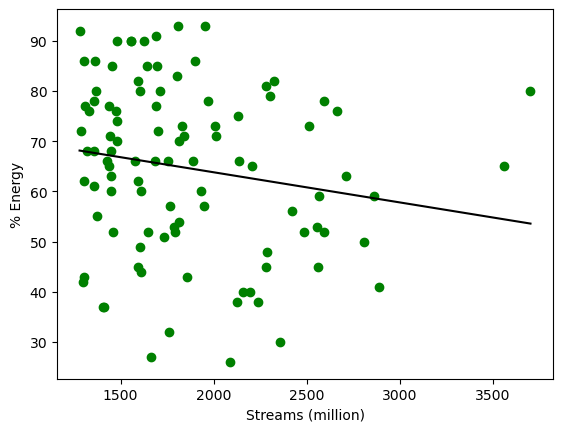

In [112]:
#Correlation between number of streams and % danceability

streams = top100_streams_df['streams mil']
energy = top100_streams_df['energy_%']

correlation = st.pearsonr(streams,energy)
print(correlation)

plt.scatter(streams,energy,marker="o", facecolors="green", edgecolors="green")
plt.xlabel("Streams (million)")
plt.ylabel("% Energy")

e_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(streams,energy)
pe_fit = e_slope * streams + pe_int
plt.plot(streams,pe_fit,color='black')

plt.show()

PearsonRResult(statistic=0.1664222910406521, pvalue=0.09795259555432682)


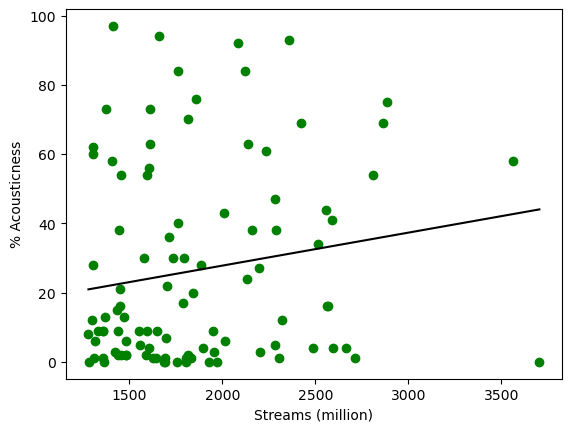

In [113]:
#Correlation between number of streams and % acousticness

streams = top100_streams_df['streams mil']
acousticness = top100_streams_df['acousticness_%']

correlation = st.pearsonr(streams,acousticness)
print(correlation)

plt.scatter(streams,acousticness,marker="o", facecolors="green", edgecolors="green")
plt.xlabel("Streams (million)")
plt.ylabel("% Acousticness")

e_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(streams,acousticness)
pe_fit = e_slope * streams + pe_int
plt.plot(streams,pe_fit,color='black')

plt.show()

PearsonRResult(statistic=-0.12144928930567885, pvalue=0.22871129353904052)


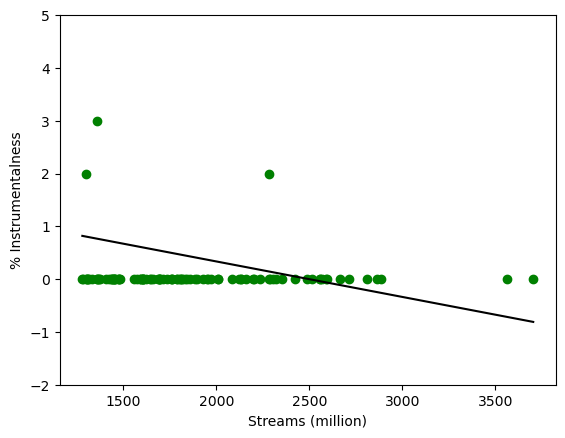

In [114]:
#Correlation between number of streams and % instrumentalness

streams = top100_streams_df['streams mil']
instrumentalness = top100_streams_df['instrumentalness_%']

correlation = st.pearsonr(streams,instrumentalness)
print(correlation)

plt.scatter(streams,instrumentalness,marker="o", facecolors="green", edgecolors="green")
plt.xlabel("Streams (million)")
plt.ylabel("% Instrumentalness")

e_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(streams,instrumentalness)
pe_fit = e_slope * streams + pe_int
plt.plot(streams,pe_fit,color='black')
plt.ylim(-2,5)

plt.show()

PearsonRResult(statistic=-0.14142629729132633, pvalue=0.16045360280898588)


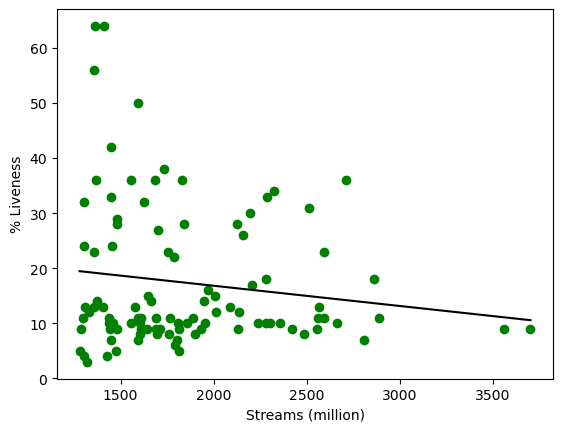

In [115]:
#Correlation between number of streams and % liveness

streams = top100_streams_df['streams mil']
liveness = top100_streams_df['liveness_%']

correlation = st.pearsonr(streams,liveness)
print(correlation)

plt.scatter(streams,liveness,marker="o", facecolors="green", edgecolors="green")
plt.xlabel("Streams (million)")
plt.ylabel("% Liveness")

e_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(streams,liveness)
pe_fit = e_slope * streams + pe_int
plt.plot(streams,pe_fit,color='black')

plt.show()

PearsonRResult(statistic=0.008872739516977604, pvalue=0.9301838046563929)


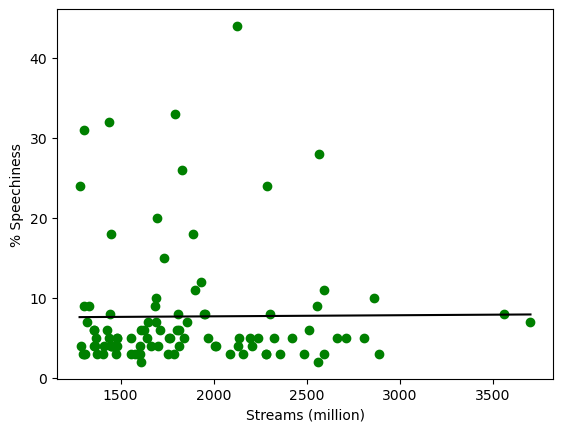

In [116]:
#Correlation between number of streams and % speechiness

streams = top100_streams_df['streams mil']
speechiness = top100_streams_df['speechiness_%']

correlation = st.pearsonr(streams,speechiness)
print(correlation)

plt.scatter(streams,speechiness,marker="o", facecolors="green", edgecolors="green")
plt.xlabel("Streams (million)")
plt.ylabel("% Speechiness")

e_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(streams,speechiness)
pe_fit = e_slope * streams + pe_int
plt.plot(streams,pe_fit,color='black')

plt.show()

PearsonRResult(statistic=-0.09860465040920187, pvalue=0.3290493191383881)


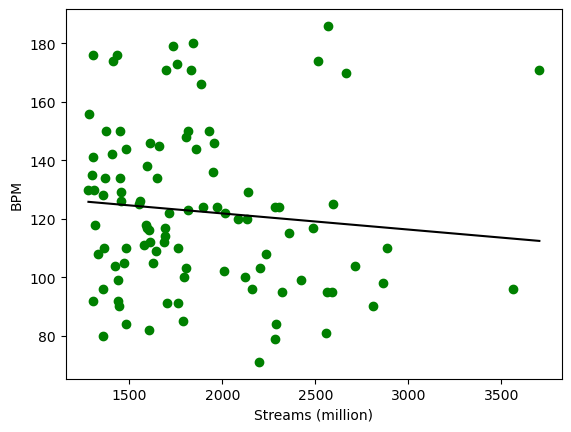

In [117]:
#Correlation between number of streams and bpm

streams = top100_streams_df['streams mil']
bpm = top100_streams_df['bpm']

correlation = st.pearsonr(streams,bpm)
print(correlation)

plt.scatter(streams,bpm,marker="o", facecolors="green", edgecolors="green")
plt.xlabel("Streams (million)")
plt.ylabel("BPM")

e_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(streams,bpm)
pe_fit = e_slope * streams + pe_int
plt.plot(streams,pe_fit,color='black')

plt.show()

In [118]:
# Analyze the mode
mode = top100_streams_df.groupby('mode')
mode_df = pd.DataFrame(mode['mode'].count()).rename(columns={'mode':'count'}).reset_index()
mode_df

,mode,count
0,Major,64
1,Minor,36


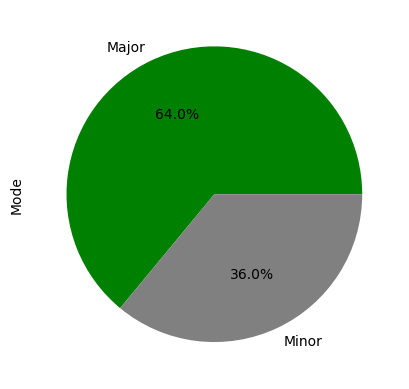

In [119]:
# Generate a pie plot with the mode information
pie_chart=mode_df['count'].plot(kind='pie',ylabel='Mode',labels=mode_df['mode'],colors=['green','grey'],autopct="%1.1f%%")
plt.show()

In [120]:
# Analyze the key
# Drop any rows with null values
top100_streams_df_reduced = top100_streams_df.dropna()
top100_streams_df_reduced


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,streams mil
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,...,C#,Minor,83,93,65,58,0,9,8,3562.54
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,...,D,Major,76,91,50,54,0,7,5,2808.10
162,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2713922350,433,...,C#,Major,77,36,63,1,0,36,5,2713.92
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2665343922,492,...,C#,Major,59,48,76,4,0,10,5,2665.34
140,Believer,Imagine Dragons,1,2017,1,31,18986,23,2594040133,250,...,A#,Minor,77,74,78,4,0,23,11,2594.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,"Quevedo: Bzrp Music Sessions, Vol. 52","Bizarrap, Quevedo",2,2022,7,6,8506,45,1356565093,94,...,D,Major,62,55,78,1,3,23,4,1356.57
37,Blank Space,Taylor Swift,1,2014,1,1,11434,53,1355959075,154,...,F,Major,75,57,68,9,0,13,6,1355.96
790,Callaita,"Bad Bunny, Tainy",2,2019,5,31,9539,15,1304313953,162,...,D,Major,61,24,62,60,0,24,31,1304.31
401,Heather,Conan Gray,1,2020,3,20,6170,7,1301799902,82,...,F,Major,47,25,43,62,0,32,3,1301.80


In [121]:
key = top100_streams_df_reduced.groupby('key')
key_df = pd.DataFrame(key['key'].count()).rename(columns={'key':'count'}).reset_index().sort_values('count',ascending=False)
key_df

,key,count
3,C#,15
7,F,10
4,D,9
2,B,7
10,G#,6
6,E,5
8,F#,4
9,G,4
1,A#,3
5,D#,3


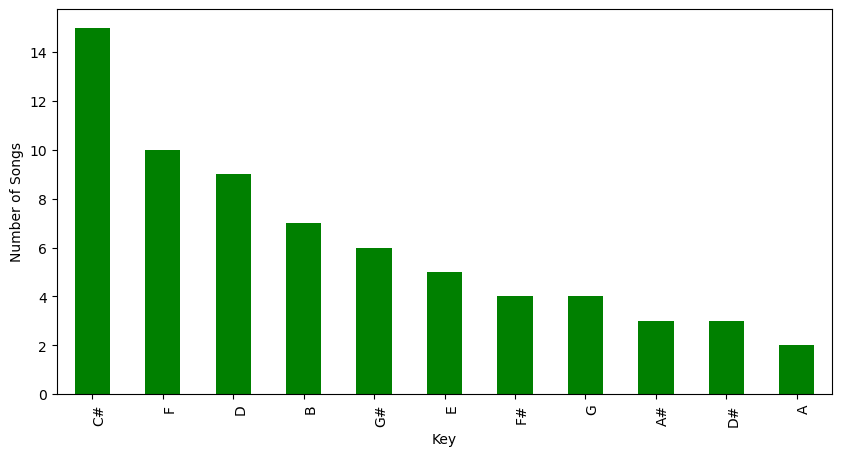

In [122]:
# Chart summarizing key analysis
bar_chart=key_df.plot(kind='bar',facecolor='green',alpha=1,xlabel="Key",ylabel="Number of Songs",legend=False,figsize=(10,5))
xticklabels = key_df["key"]
bar_chart.set_xticklabels(xticklabels, rotation=90, rotation_mode='anchor', ha='right',fontsize=10)
plt.show()

In [123]:
# Artist count analysis
artistcount = top100_streams_df.groupby('artist_count')
artistcount_df = pd.DataFrame(artistcount['artist_count'].count()).rename(columns={'artist_count':'count'}).reset_index().sort_values('count',ascending=False)
artistcount_df


,artist_count,count
0,1,73
1,2,23
2,3,4


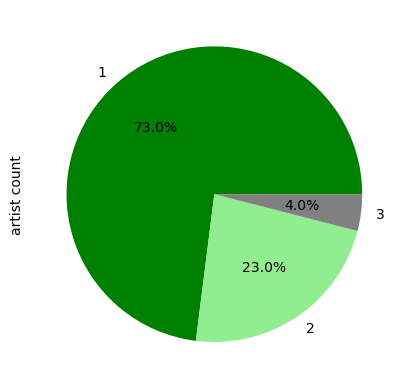

In [128]:
# Generate a pie plot with the artist count information
pie_chart=artistcount_df['count'].plot(kind='pie',ylabel='artist count',labels=artistcount_df['artist_count'],colors=['green','lightgreen','grey'],autopct="%1.1f%%")
plt.show()

PearsonRResult(statistic=0.3171351404454369, pvalue=0.0013049343703472572)


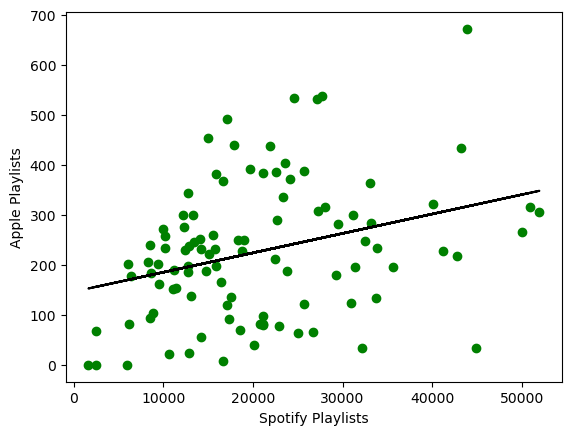

In [125]:
#Correlation between presence in spotify playlists and in apple playlists

spotify = top100_streams_df['in_spotify_playlists']
apple = top100_streams_df['in_apple_playlists']

correlation = st.pearsonr(spotify,apple)
print(correlation)

plt.scatter(spotify,apple,marker="o", facecolors="green", edgecolors="green")
plt.xlabel("Spotify Playlists")
plt.ylabel("Apple Playlists")

e_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(spotify,apple)
pe_fit = e_slope * spotify + pe_int
plt.plot(spotify,pe_fit,color='black')

plt.show()

PearsonRResult(statistic=0.34807793815879595, pvalue=0.00038718844147505433)


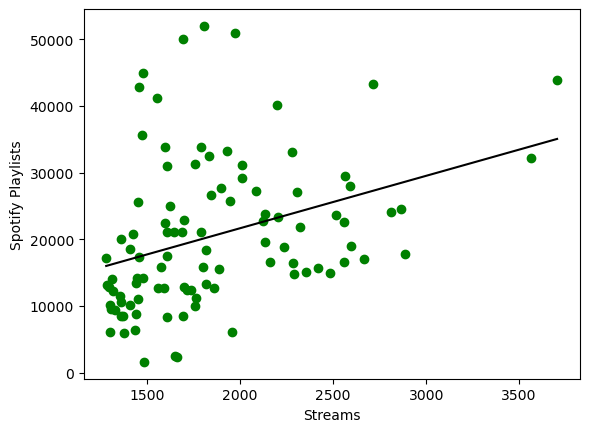

In [127]:
#Correlation between presence in spotify playlists and in apple playlists

correlation = st.pearsonr(streams,spotify)
print(correlation)

plt.scatter(streams,spotify,marker="o", facecolors="green", edgecolors="green")
plt.xlabel("Streams")
plt.ylabel("Spotify Playlists")

e_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(streams,spotify)
pe_fit = e_slope * streams + pe_int
plt.plot(streams,pe_fit,color='black')

plt.show()

In [126]:
#Correlation between presence in spotify playlists and in deezer playlists

spotify = top100_streams_df['in_spotify_playlists']
deezer = top100_streams_df['in_deezer_playlists']

correlation = st.pearsonr(spotify,deezer)
print(correlation)

plt.scatter(spotify,deezer,marker="o", facecolors="green", edgecolors="green")
plt.xlabel("Spotify Playlists")
plt.ylabel("Deezer Playlists")

e_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(spotify,deezer)
pe_fit = e_slope * spotify + pe_int
plt.plot(spotify,pe_fit,color='black')

plt.show()

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('float64'), dtype('<U5')) -> None